In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
trials_data= pd.read_csv("trials_training_data.csv")

In [3]:
trials_data

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,base_lr,epochs,...,loss/val,lr,precip_val_loss,temp_val_loss,tmax_val_loss,tmin_val_loss,total_val_loss,trial,weights,initial_weights
0,UNCONSTRAINED_trial_4,finished,-,NaN,NaN,2025-07-24T11:20:40.000Z,6985,NaN,NaN,NaN,...,0.000033,0.0008,0.000004,0.000060,0.000065,0.000119,0.000033,4,"[0.5644386493972359,0.16201322630975604,0.0653...","[0.8933313583890515,0.2564166994780495,0.10337..."
1,UNCONSTRAINED_trial_15,finished,-,NaN,NaN,2025-07-25T08:17:34.000Z,6913,NaN,NaN,NaN,...,0.000047,0.0010,0.000005,0.000075,0.000089,0.000074,0.000047,15,"[0.41815413628913534,0.09436648171007232,0.349...","[0.7360440888517883,0.16610595237640316,0.6159..."
2,UNCONSTRAINED_trial_1,finished,-,NaN,NaN,2025-07-24T05:36:53.000Z,6830,NaN,NaN,NaN,...,0.000048,0.0008,0.000005,0.000075,0.000078,0.000067,0.000048,1,"[0.34872918823286153,0.05764064453690849,0.402...","[0.7922040049511389,0.13094157584426985,0.9136..."
3,trial*_25,finished,-,NaN,NaN,2025-07-22T14:35:58.000Z,8706,NaN,NaN,NaN,...,0.000048,0.0008,0.000004,0.000052,0.000081,0.000090,0.000048,25,"[0.3410072868046871,0.2909043694955993,0.19833...","[0.3507590560457098,0.2992233479816839,0.20400..."
4,trial_13,finished,-,NaN,NaN,2025-07-21T08:25:08.000Z,7015,NaN,NaN,NaN,...,0.000050,0.0010,0.000005,0.000055,0.000096,0.000078,0.000050,30,"[0.32542961154530525,0.2777621013813828,0.2797...",NaN
5,trial_5,finished,-,NaN,NaN,2025-07-20T17:38:06.000Z,7075,NaN,NaN,NaN,...,0.000051,0.0008,0.000005,0.000058,0.000072,0.000087,0.000051,8,"[0.3118304899680882,0.2532597408016314,0.20394...",NaN
6,UNCONSTRAINED_trial_7,finished,-,NaN,NaN,2025-07-24T17:08:24.000Z,6853,NaN,NaN,NaN,...,0.000052,0.0008,0.000005,0.000058,0.000106,0.000097,0.000049,7,"[0.4069492298088306,0.29069203296865415,0.2086...","[0.9195119486618912,0.6568259087775123,0.47144..."
7,trial_0,finished,-,NaN,NaN,2025-07-20T10:31:40.000Z,17670,NaN,NaN,NaN,...,0.000054,0.0008,0.000004,0.000056,0.000084,0.000098,0.000054,0,"[0.2886978837916178,0.3378427925582116,0.16448...",NaN
8,trial_14,finished,-,NaN,NaN,2025-07-21T10:22:04.000Z,7038,NaN,NaN,NaN,...,0.000054,0.0008,0.000005,0.000065,0.000101,0.000091,0.000052,31,"[0.39917137031543554,0.23347669290918308,0.232...",NaN
9,trial*_34,finished,-,NaN,NaN,2025-07-22T22:31:36.000Z,7095,NaN,NaN,NaN,...,0.000055,0.0010,0.000004,0.000059,0.000082,0.000104,0.000055,34,"[0.3075547803813682,0.3018606442559098,0.16103...","[0.6948485145885592,0.6819839379959481,0.36381..."


In [4]:
trials_data.columns

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'base_lr', 'epochs', 'loss', 'loss_weights', 'max_lr', 'mode',
       'optimizer', 'optuna_trial', 'scheduler', 'RhiresD/train',
       'RhiresD/val', 'TabsD/train', 'TabsD/val', 'TmaxD/train', 'TmaxD/val',
       'TminD/train', 'TminD/val', 'best_val_loss',
       'best_val_loss_per_channel', 'epoch', 'epoch_time', 'loss/train',
       'loss/val', 'lr', 'precip_val_loss', 'temp_val_loss', 'tmax_val_loss',
       'tmin_val_loss', 'total_val_loss', 'trial', 'weights',
       'initial_weights'],
      dtype='object')

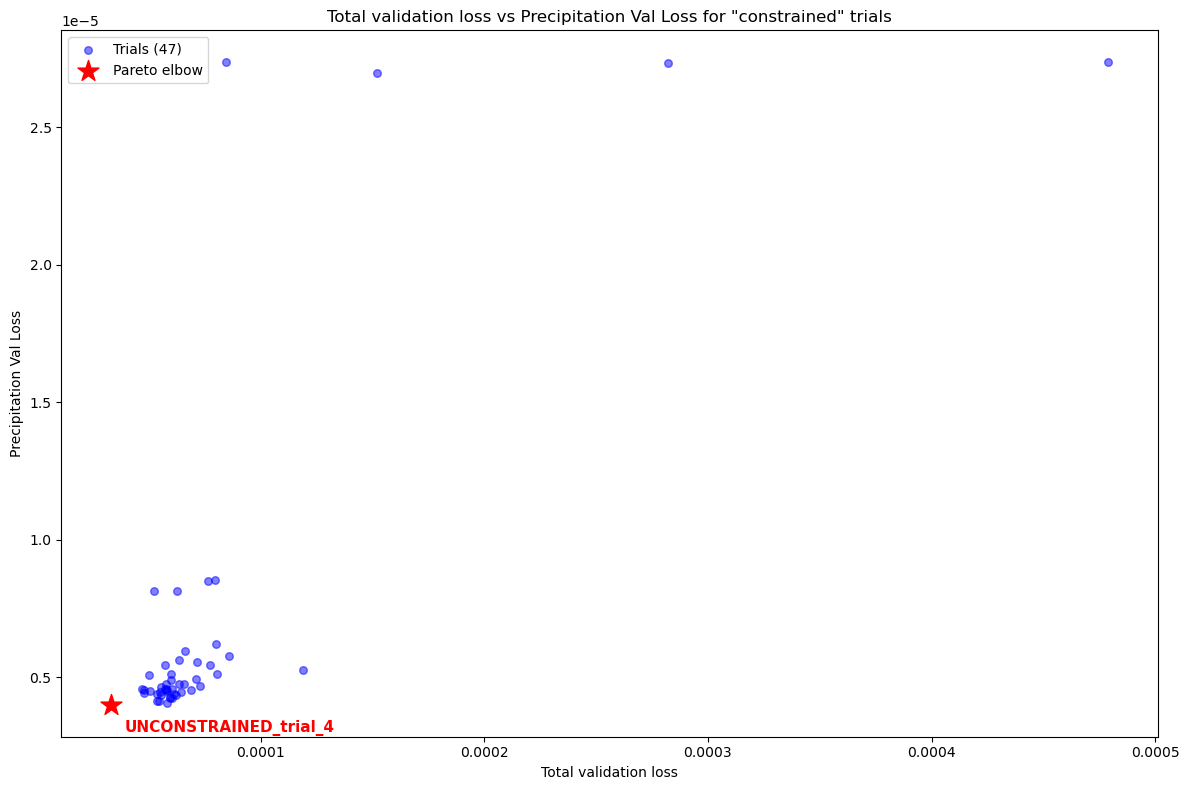

In [5]:
y = trials_data['RhiresD/val'].values
x = trials_data['loss/val'].values

def pareto_front_2d(x, y):
    # Sort by x (first objective)
    idx_sorted = np.argsort(x)
    pareto_idx = []
    min_y = np.inf
    for idx in idx_sorted:
        if y[idx] < min_y:
            pareto_idx.append(idx)
            min_y = y[idx]
    pareto_points = np.array(list(zip(x[pareto_idx], y[pareto_idx])))
    return pareto_points, np.array(pareto_idx)

pareto_points, pareto_idx = pareto_front_2d(x, y)

plt.figure(figsize=(12, 8))
plt.scatter(x, y, label='Trials (47)', color='blue', alpha=0.5, s=30)
# Annotate Pareto "elbow" (closest to origin)
pareto_distances = np.sqrt(pareto_points[:,0]**2 + pareto_points[:,1]**2)
elbow_idx = np.argmin(pareto_distances)
elbow_x, elbow_y = pareto_points[elbow_idx]
elbow_trial_idx = pareto_idx[elbow_idx]
elbow_trial_name = trials_data.iloc[elbow_trial_idx]['Name']
plt.scatter(elbow_x, elbow_y, marker='*', s=250, color='red', label='Pareto elbow')
plt.annotate(f'{elbow_trial_name}', (elbow_x, elbow_y),
             textcoords="offset points", xytext=(10,-20), ha='left', color='red', fontsize=11, fontweight='bold')

plt.xlabel('Total validation loss')
plt.ylabel('Precipitation Val Loss')
plt.title('Total validation loss vs Precipitation Val Loss for "constrained" trials')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig('pareto_front_plot.png', dpi=500, bbox_inches='tight')